# Atividade - Previsão de Votação de Deputados (respostas no final)
###### Modelos preditivos de regressão em scikit learn para a predição dos votos de deputados federais considerando as eleições de 2014

###### Atividade realizada para disciplina de Aprendizagem de Máquina - 2022.2, usando a pipeline encontrada neste [link aqui](https://www.kaggle.com/code/apapiu/regularized-linear-models/notebook)

# 1 - Importações dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

# 2 - Carrega dos dados completos

Carrega a planilha de dados das eleições de 2006 a 2010

In [2]:
eleicoes = pd.read_csv("data/eleicoes_2006_a_2010.csv")

In [3]:
eleicoes

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.00,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.00,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,2010,270000000264,ROBERTO PEREIRA URBANO,TO,PSC,3,3,3370.00,1123.333333,370.00,...,16,16,3363.41,210.213125,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
7326,2010,270000000265,RONALDO DIMAS NOGUEIRA PEREIRA,TO,PR,715,706,1034323.16,1465.046969,211804.58,...,1658,1275,815638.26,639.716282,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
7327,2010,270000000266,SÉRGIO PERIN,TO,PTB,2,2,2600.00,1300.000000,NaN,...,2,2,2600.00,1300.000000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20
7328,2010,270000000267,ÍTALO MARCEL COSTA CONCEIÇÃO,TO,PR,2,2,5175.00,2587.500000,3375.00,...,2,2,5175.00,2587.500000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BANCÁRIO E ECONOMIÁRIO,293


Visualização rápida dos dados

In [4]:
eleicoes[:3]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.8,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428


# 3 - Análise dos dados

Inicialmente, vamos observar o valor alvo que é a quantidade de voto.

array([[<AxesSubplot: title={'center': 'votos'}>,
        <AxesSubplot: title={'center': 'log(votos)'}>]], dtype=object)

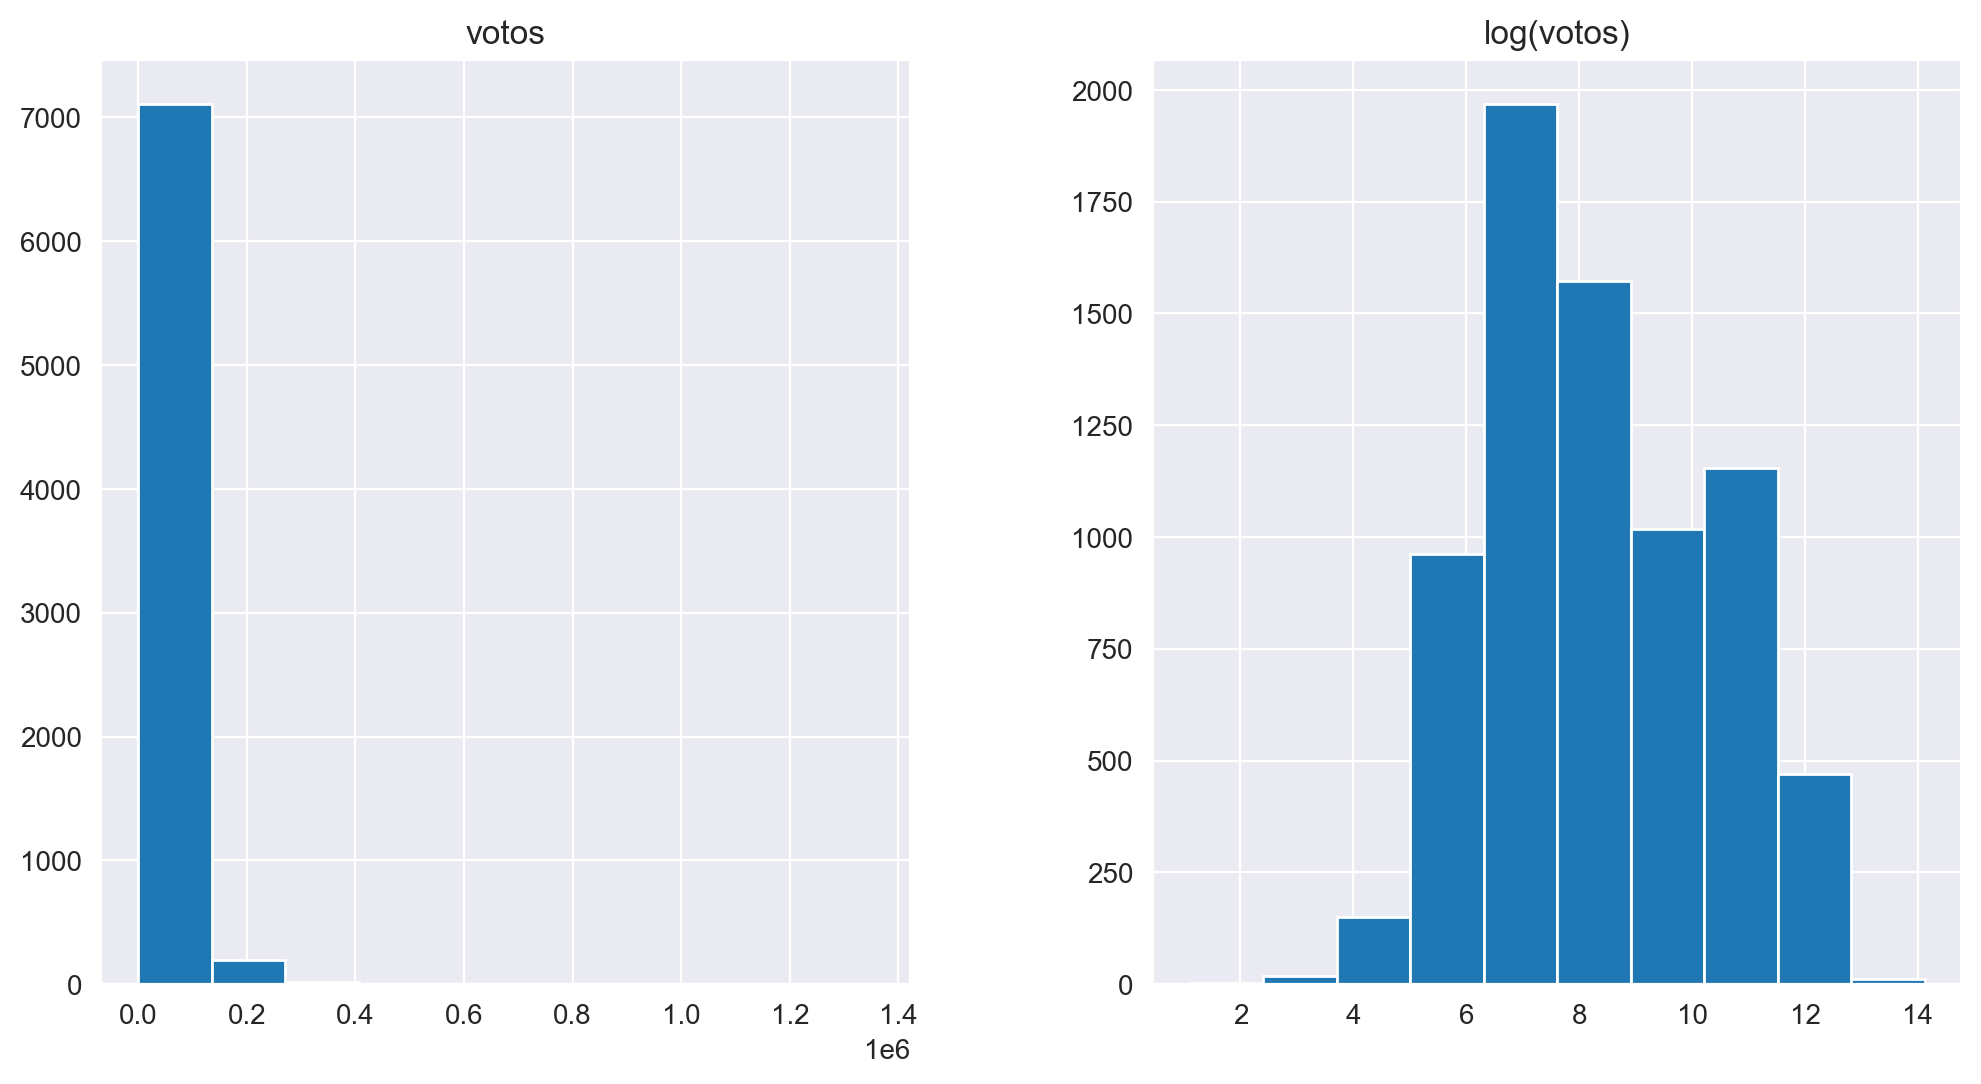

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
votos = pd.DataFrame({"votos":eleicoes["votos"], "log(votos)":np.log1p(eleicoes["votos"])})
votos.hist()

A distribuição está enviesada. No gráfico (à esquerda) podemos verificar que há uma ‘cauda’ longa com uma concentração de dados maior perto de 0. Por esse motivo, aplicamos o log nos dados (à direita)


# 4 - Tratamentos


## 4.1 Tratamento de variáveis numéricas

In [6]:
eleicoes["votos"] = np.log1p(eleicoes["votos"])

numeric_feats = eleicoes.dtypes[eleicoes.dtypes != "object"].index
skewed_feats  = eleicoes[numeric_feats].apply(lambda x: x.dropna().skew())
skewed_feats  = skewed_feats [skewed_feats  > 0.75]
skewed_feats = skewed_feats.index

eleicoes[skewed_feats] = np.log1p(eleicoes[skewed_feats])
eleicoes[numeric_feats][:3]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,votos
0,2006,10001,1.945910,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,2.708050,9.716230,7.077956,9.057189
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,3.178054,9.919705,6.785292,7.922261
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,4.691348,11.891449,7.210050,9.765891


## 4.2 Tratamento de de valores ausentes


In [7]:
eleicoes = eleicoes.fillna(eleicoes.mean())

C:\Users\marcio.pereira\AppData\Local\Temp\ipykernel_29584\714546568.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  eleicoes = eleicoes.fillna(eleicoes.mean())


## 4.3 Tratamento de variáveis categóricas

Inicialmente, devemos verificar a forma do dataset.

In [8]:
eleicoes.shape

(7330, 23)

Verificando essa informação temos 7330 linhas e 23 colunas

In [9]:
eleicoes = pd.get_dummies(eleicoes)
eleicoes.shape

(7330, 7038)

É possível verificar que a forma (shape) do dataset mudou, vejamos a seguir:

In [10]:
eleicoes[:3]

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,10001,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,...,0,0,0,0,0,0,1,0,0,0
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,...,0,0,0,0,0,0,0,0,0,0
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,...,0,0,0,0,0,0,0,0,0,0


## 4.4 Criação do dataset de treino(train) e teste(test)

In [11]:
# Removi a sequêncial do candidato pois é irrelevante estava gerando um ruído nos dados
eleicoes = eleicoes.drop(['sequencial_candidato'], axis=1)

# Conforme sugerido, os dados foram divididos sendo o treino representando 2006 e teste representando 2010
train = eleicoes.query('ano == 2006')
test = eleicoes.query('ano == 2010')

Visualização de dados de treino

In [12]:
train[:3]

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,2.708050,...,0,0,0,0,0,0,1,0,0,0
1,2006,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,...,0,0,0,0,0,0,0,0,0,0
2,2006,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,...,0,0,0,0,0,0,0,0,0,0


Visualização de dados de teste

In [13]:
test[:3]

,ano,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
3388,2010,3.610918,3.583519,12.916305,9.361041,12.503138,10.975944,8.926358,11.463068,4.007333,...,0,0,0,0,0,0,0,0,0,0
3389,2010,1.386294,1.386294,8.852379,7.754053,8.324939,8.984406,8.610866,7.313887,1.386294,...,0,0,0,0,0,0,0,0,0,0
3390,2010,1.386294,1.386294,7.518064,6.420538,5.673323,7.313887,10.011960,3.931826,1.386294,...,0,0,0,0,0,0,0,0,0,0


# 5 - Criação dos modelos

### 5 - Criação dos datasets de treino e teste

In [14]:
# Separa as outras colunas e remove a coluna de "votos" que é a variável alvo
x_train = train.drop('votos', axis=1)
y_train = train['votos']

# Mesmo processo para o dataset de testes
x_test = test.drop('votos', axis=1)
y_test = test['votos']

In [15]:
y_train

0        9.057189
1        7.922261
2        9.765891
3        7.085064
4       10.288818
          ...    
3383     7.503290
3384     6.695799
3385     7.586804
3386     8.868695
3387    10.713395
Name: votos, Length: 3388, dtype: float64

## 5.1 - Sem regularização

Vamos montar uma regressão simples para verificar sem qualquer tipo de regularização

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(x_train, y_train)

train_predictions_lin_reg = reg.predict(x_test)

In [17]:
train_predictions_lin_reg

array([9.91315756, 9.40255961, 6.85773492, ..., 6.58302478, 6.43886673,
       7.67682685])

In [18]:
np.sqrt(mean_squared_error(y_test, train_predictions_lin_reg))

1.1257411506854094

Text(0.5, 1.0, 'Regressão sem regularização (resíduos versus predições)')

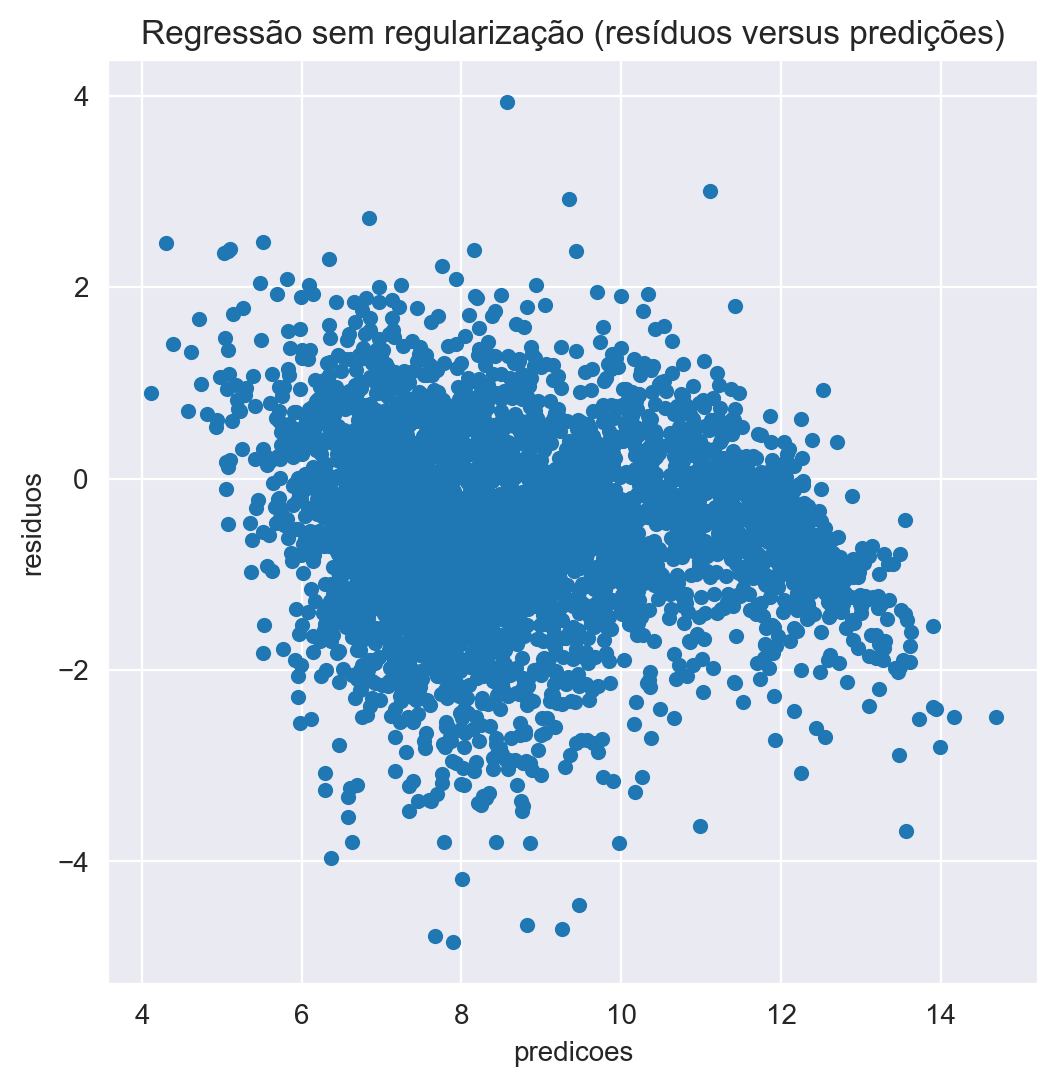

In [19]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"predicoes":train_predictions_lin_reg, "valor_verdadeiro":y_test})
preds["residuos"] = preds["valor_verdadeiro"] - preds["predicoes"]
preds.plot(x = "predicoes", y = "residuos",kind = "scatter")
plt.title("Regressão sem regularização (resíduos versus predições)")

Podemos observar dados bastante espalhados, alguns próximos à 0, mas muitos outros com alguns erros.

## 5.2 - Ridge

Criação do modelo Ridge

In [20]:
from sklearn.linear_model import Ridge, LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [21]:
model_ridge = Ridge()

In [22]:
model_ridge.fit(x_train, y_train)

Ridge()

In [23]:
train_predictions_ridge = model_ridge.predict(x_test)
train_predictions_ridge

array([9.92730085, 8.44756983, 6.8022759 , ..., 6.64442723, 6.48187427,
       7.71521208])

In [24]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]

Text(0, 0.5, 'rmse')

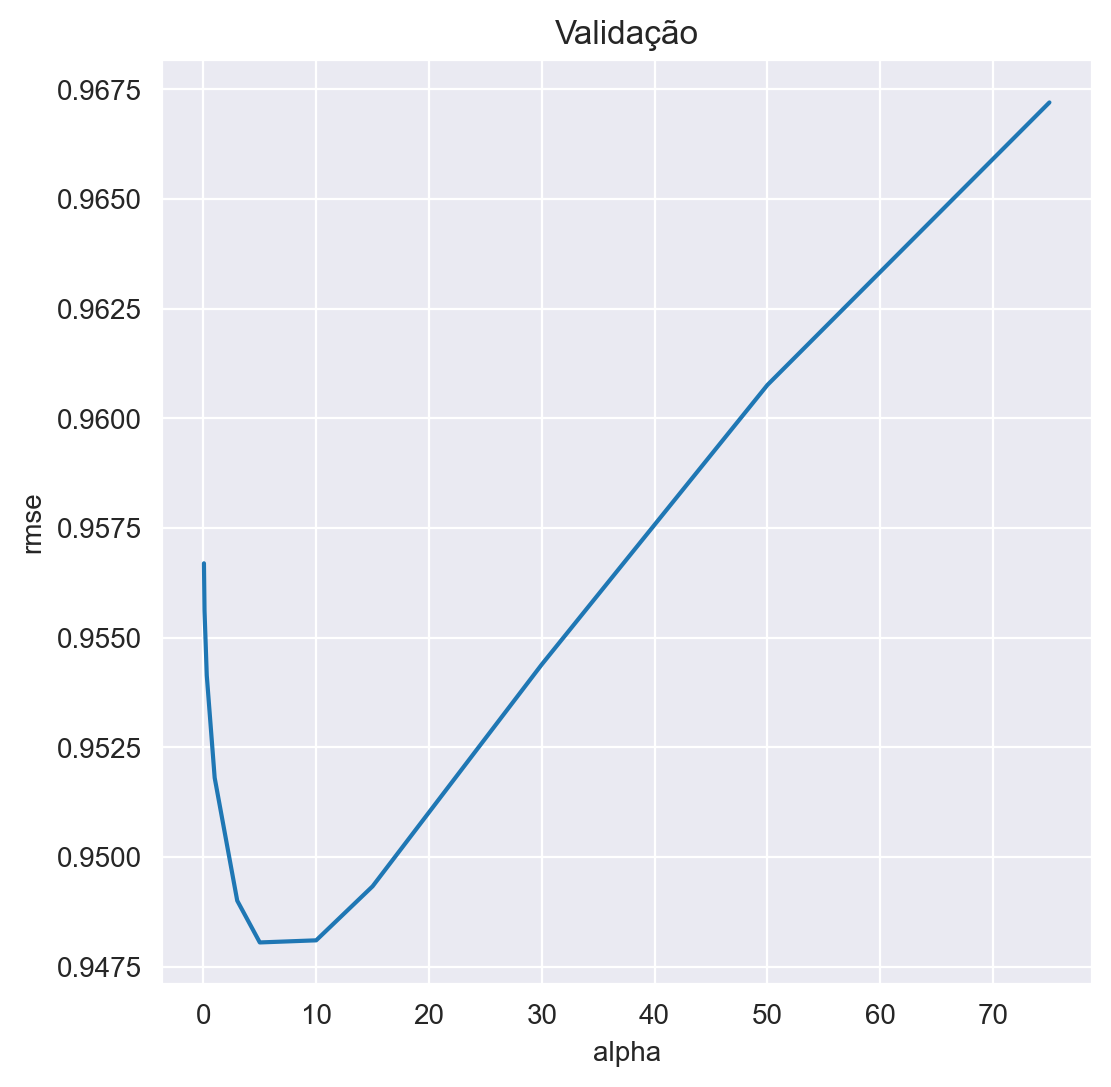

In [25]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validação")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [26]:
cv_ridge.min()

0.9480558396376051

Text(0.5, 1.0, 'Ridge (resíduos versus predições)')

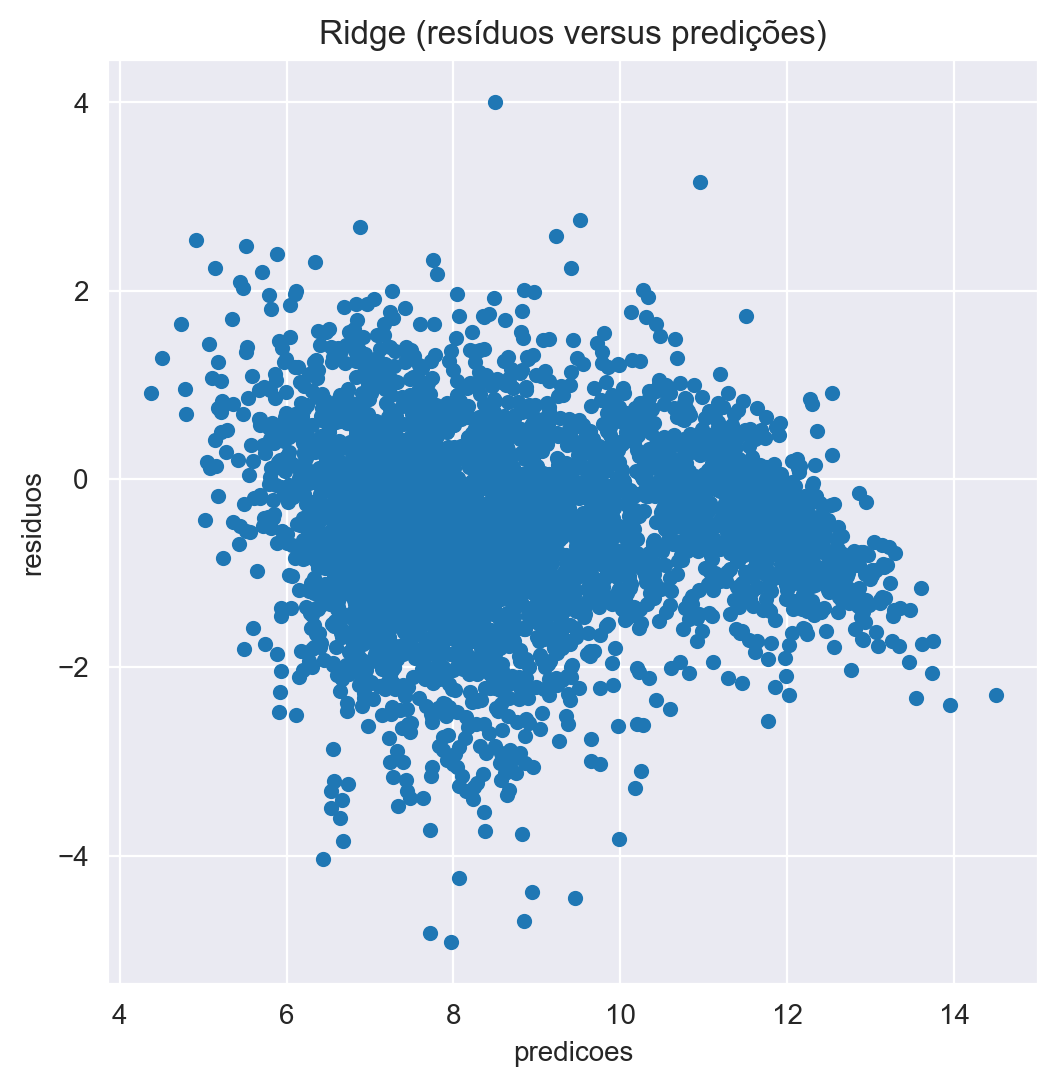

In [27]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"predicoes":train_predictions_ridge, "valor_verdadeiro":y_test})
preds["residuos"] = preds["valor_verdadeiro"] - preds["predicoes"]
preds.plot(x = "predicoes", y = "residuos", kind = "scatter")
plt.title("Ridge (resíduos versus predições)")

## 5.3 - Lasso

Criação do modelo Lasso

In [28]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.005], max_iter=3000).fit(x_train, y_train)

In [29]:
model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.005], max_iter=3000)

In [30]:
rmse_cv(model_lasso).mean()

C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.831e-01, tolerance: 8.208e-01
  model = cd_fast.enet_coordinate_descent(
C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+00, tolerance: 7.895e-01
  model = cd_fast.enet_coordinate_descent(
C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

0.9492347884272844

In [31]:
train_predictions_lasso = model_lasso.predict(x_test)
train_predictions_lasso

array([9.98452851, 7.5362168 , 6.68249022, ..., 6.6415496 , 6.609202  ,
       7.78904694])

Text(0.5, 1.0, 'Lasso (resíduos versus predições)')

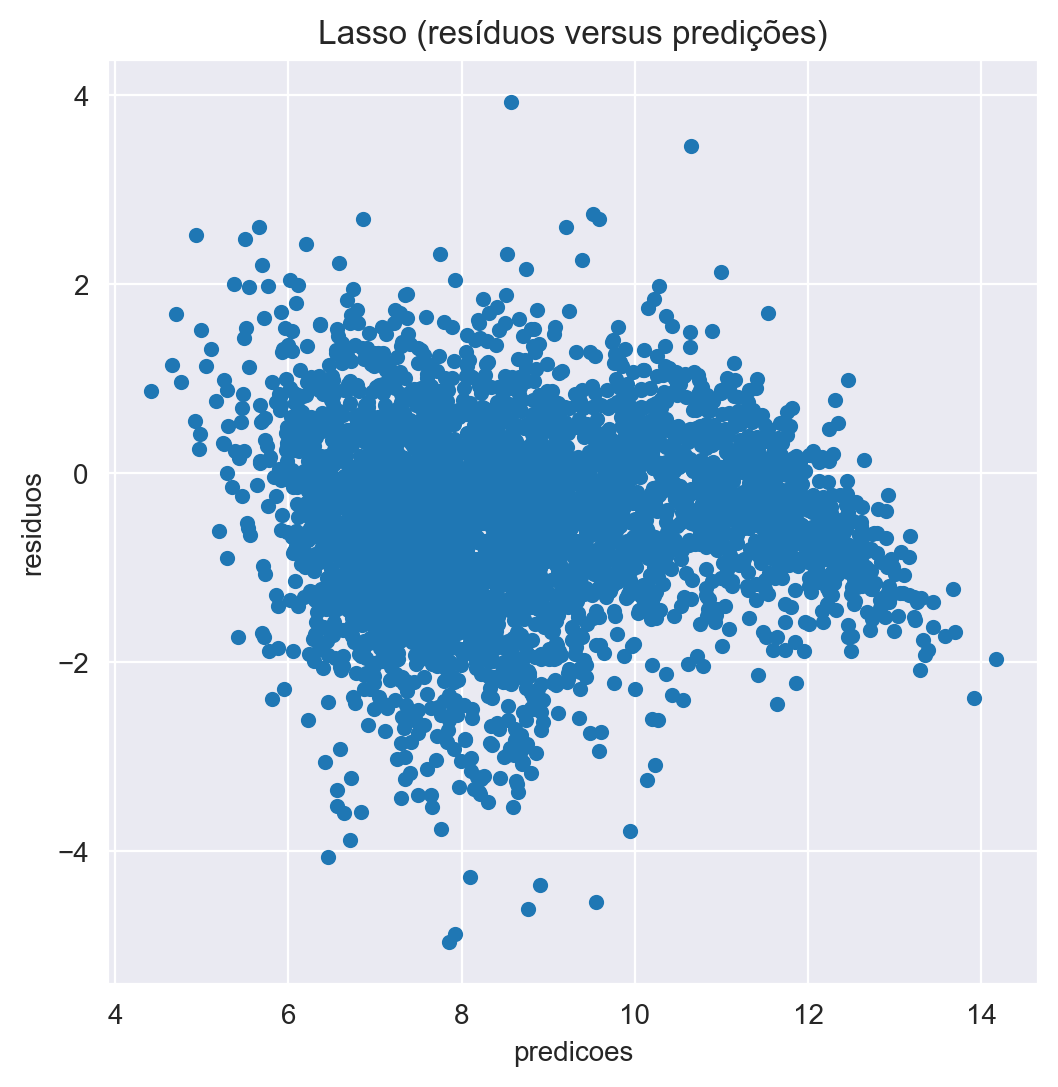

In [32]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"predicoes":train_predictions_lasso, "valor_verdadeiro":y_test})
preds["residuos"] = preds["valor_verdadeiro"] - preds["predicoes"]
preds.plot(x = "predicoes", y = "residuos",kind = "scatter")
plt.title("Lasso (resíduos versus predições)")

## 5.4 - KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)
train_predictions_knn = model_knn.predict(x_test)

In [34]:
np.sqrt(mean_squared_error(y_test, train_predictions_knn))

1.179446354750474

Text(0.5, 1.0, 'KNN (resíduos versus predições)')

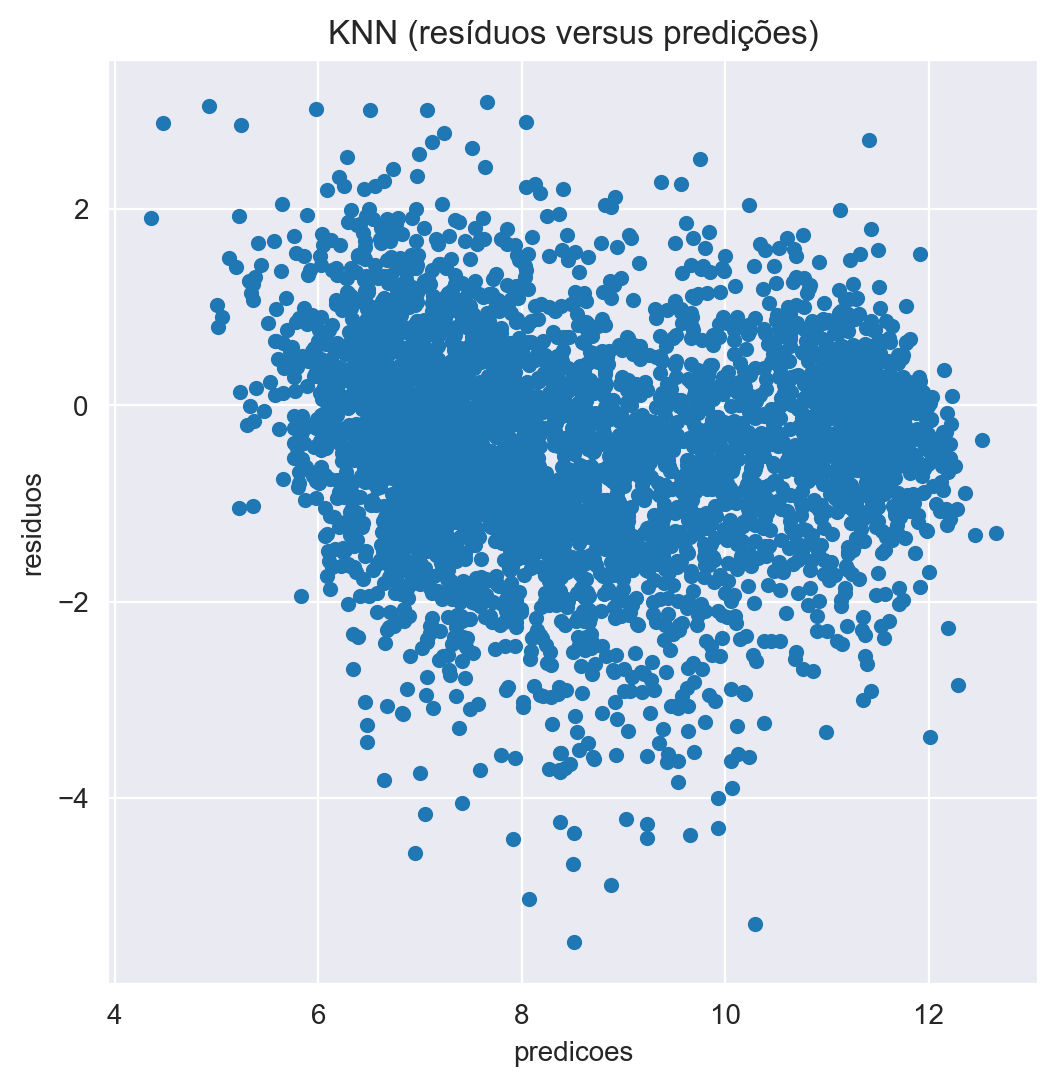

In [35]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"predicoes":train_predictions_knn, "valor_verdadeiro":y_test})
preds["residuos"] = preds["valor_verdadeiro"] - preds["predicoes"]
preds.plot(x = "predicoes", y = "residuos",kind = "scatter")
plt.title("KNN (resíduos versus predições)")

## 5.5 - Discussões

Todos os plots apresentam pouca adequação, sendo o mais perto, Ridge mesmo assim, ainda há espalhamento dos dados, talvez algum ruído causado por alguma coluna desnecessária.

Text(0.5, 1.0, 'KNN (resíduos versus predições)')

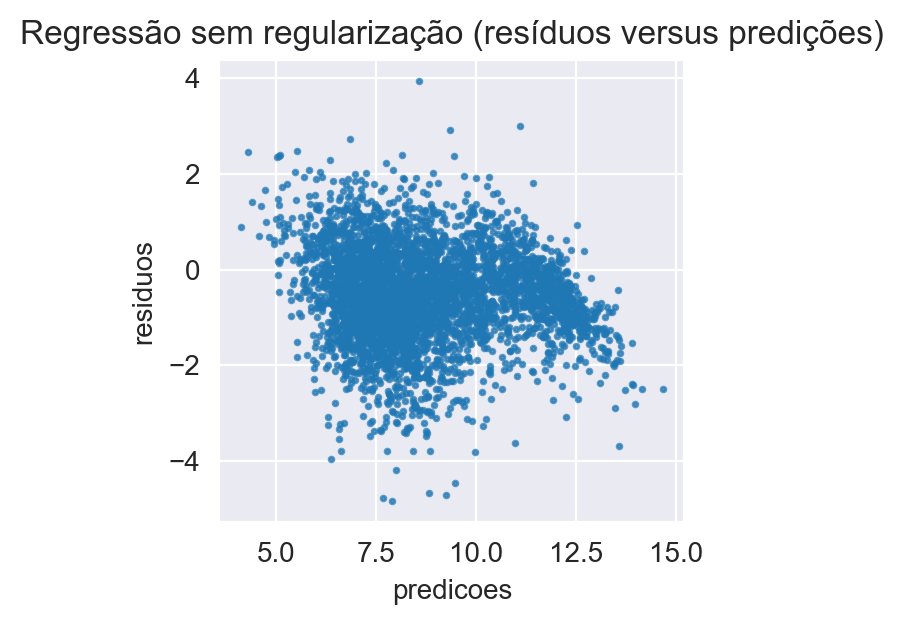

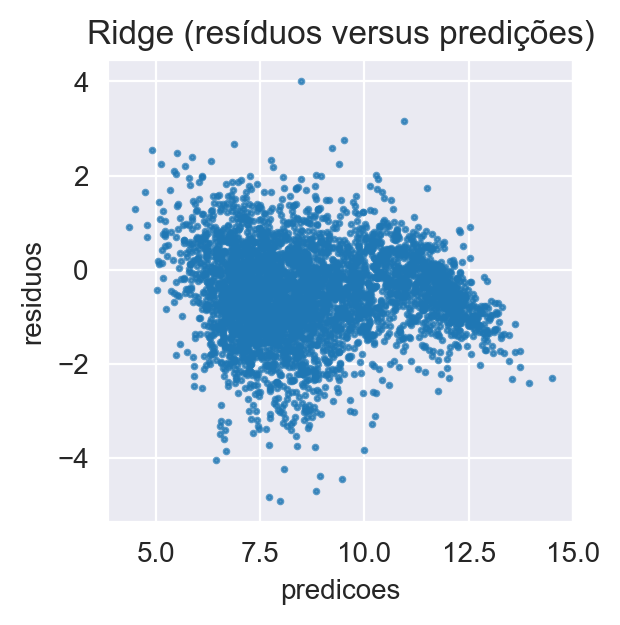

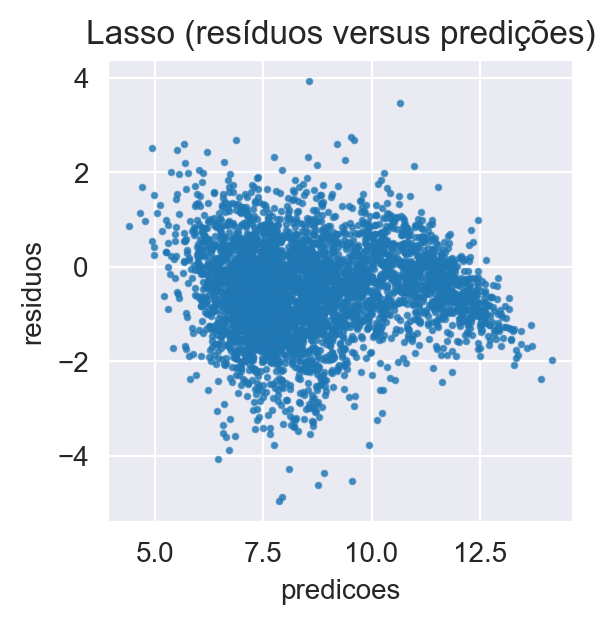

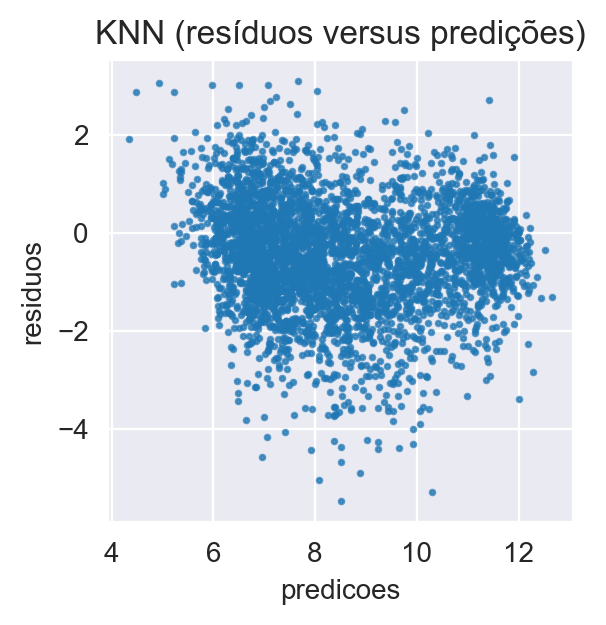

In [36]:
matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
preds_lg = pd.DataFrame({"predicoes":train_predictions_lin_reg, "valor_verdadeiro":y_test})
preds_lg["residuos"] = preds_lg["valor_verdadeiro"] - preds_lg["predicoes"]
preds_lg.plot(x = "predicoes", y = "residuos",kind = "scatter", alpha=0.7 , s=3)
plt.title("Regressão sem regularização (resíduos versus predições)")

matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
preds_r = pd.DataFrame({"predicoes":train_predictions_ridge, "valor_verdadeiro":y_test})
preds_r["residuos"] = preds_r["valor_verdadeiro"] - preds_r["predicoes"]
preds_r.plot(x = "predicoes", y = "residuos", kind = "scatter", alpha=0.7 , s=3)
plt.title("Ridge (resíduos versus predições)")

matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
preds_l = pd.DataFrame({"predicoes":train_predictions_lasso, "valor_verdadeiro":y_test})
preds_l["residuos"] = preds_l["valor_verdadeiro"] - preds_l["predicoes"]
preds_l.plot(x = "predicoes", y = "residuos",kind = "scatter", alpha=0.7 , s=3)
plt.title("Lasso (resíduos versus predições)")

matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
preds_knn = pd.DataFrame({"predicoes":train_predictions_knn, "valor_verdadeiro":y_test})
preds_knn["residuos"] = preds_knn["valor_verdadeiro"] - preds_knn["predicoes"]
preds_knn.plot(x = "predicoes", y = "residuos",kind = "scatter", alpha=0.7 , s=3)
plt.title("KNN (resíduos versus predições)")

# 6 - Comparando agora com dados de 2014

In [37]:
eleicoes_14 = pd.read_csv('data/eleicoes_2014.csv')
eleicoes_14[:3]

,ano,sq_candidato,nome_candidato,sigla_uf,sigla_partido,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,...,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,descricao_cargo,sexo,grau_instrucao,estado_civil,descricao_ocupacao,votos
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.666667,NaN,...,3,3,1580.00,526.666667,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",37
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.000000,NaN,...,6,5,3130.02,626.004000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE,383
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,333293.13,8770.871842,1923.07,...,145,139,326869.78,2351.581151,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS,26448


### Tratamentos

In [38]:
numeric_feats = eleicoes_14.dtypes[eleicoes_14.dtypes != "object"].index
skewed_feats = eleicoes_14[numeric_feats].apply(lambda x: x.dropna().skew())
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

eleicoes_14[skewed_feats] = np.log1p(eleicoes_14[skewed_feats])
eleicoes_14 = eleicoes_14.fillna(eleicoes_14.mean())
eleicoes_14[numeric_feats][:2]

C:\Users\marcio.pereira\AppData\Local\Temp\ipykernel_29584\425947213.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  eleicoes_14 = eleicoes_14.fillna(eleicoes_14.mean())


,ano,sq_candidato,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,recursos de pessoas físicas,recursos de pessoas jurídicas,recursos próprios,qtd_despesas,qtd_fornecedores,total_despesa,media_despesa,votos
0,2014,10000000135,1.386294,1.386294,7.365813,6.268465,8.442226,7.313887,10.039024,8.505303,1.386294,1.386294,7.365813,6.268465,3.637586
1,2014,10000000142,1.791759,1.791759,8.064951,6.456770,8.442226,8.039480,10.039024,8.505303,1.945910,1.791759,8.049114,6.440953,5.950643


In [39]:
eleicoes_14 = pd.get_dummies(eleicoes)
eleicoes_14.shape

(7330, 7037)

In [40]:
x_completo = eleicoes.drop('votos', axis=1)
y_completo = eleicoes['votos']

x_test = eleicoes_14.drop('votos', axis=1)
y_test = eleicoes_14['votos']

## 6.1 - Ridge

In [41]:
model_ridge_all = Ridge()
model_ridge_all.fit(x_completo, y_completo)

Ridge()

In [42]:
train_predictions_ridge_all = model_ridge_all.predict(x_test)
train_predictions_ridge_all

array([8.77802516, 8.05988138, 9.83157672, ..., 4.44040857, 5.99031507,
       7.26117036])

In [43]:
cv_ridge.min()

0.9480558396376051

In [51]:
np.sqrt(mean_squared_error(y_test, train_predictions_ridge_all))

0.4619683736729403

Text(0.5, 1.0, 'Ridge (resíduos versus predições')

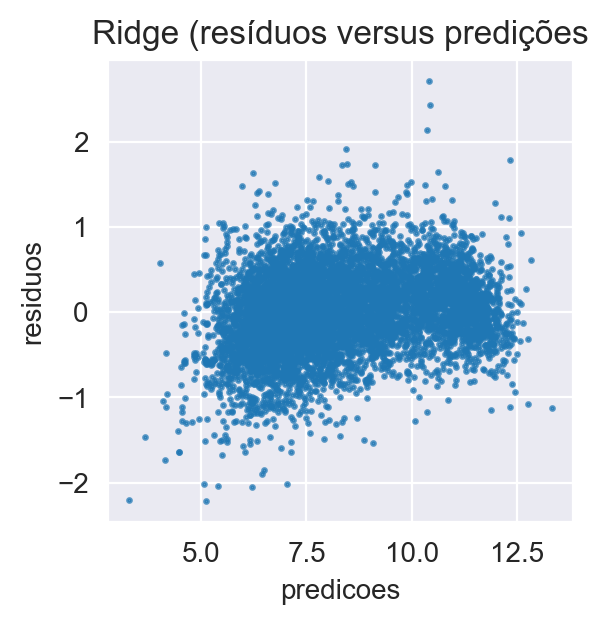

In [44]:
matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
predicoes = pd.DataFrame({"predicoes": train_predictions_ridge_all, "valor_real": y_test})
predicoes["residuos"] = predicoes["valor_real"] - predicoes["predicoes"]
predicoes.plot(x="predicoes", y="residuos", kind="scatter", alpha=0.7 , s=2)
plt.title("Ridge (resíduos versus predições")

## 6.2 - Lasso

In [45]:
model_lasso_all = LassoCV(alphas = [1, 0.1, 0.001, 0.005], max_iter=3000).fit(x_completo, y_completo)

In [46]:
rmse_cv(model_lasso_all).mean()

C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.831e-01, tolerance: 8.208e-01
  model = cd_fast.enet_coordinate_descent(
C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+00, tolerance: 7.895e-01
  model = cd_fast.enet_coordinate_descent(
C:\projects\ufcg\mestrado\previsao-votacao-deputados\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

0.9492347884272844

In [47]:
train_predictions_lasso_all = model_lasso_all.predict(x_test)
train_predictions_lasso_all

array([8.49512184, 8.22153154, 9.21709931, ..., 6.02530035, 6.47995825,
       7.51934299])

In [48]:
np.sqrt(mean_squared_error(y_test, train_predictions_lasso_all))

0.9183360098016389

Text(0.5, 1.0, 'Lasso (resíduos versus predições)')

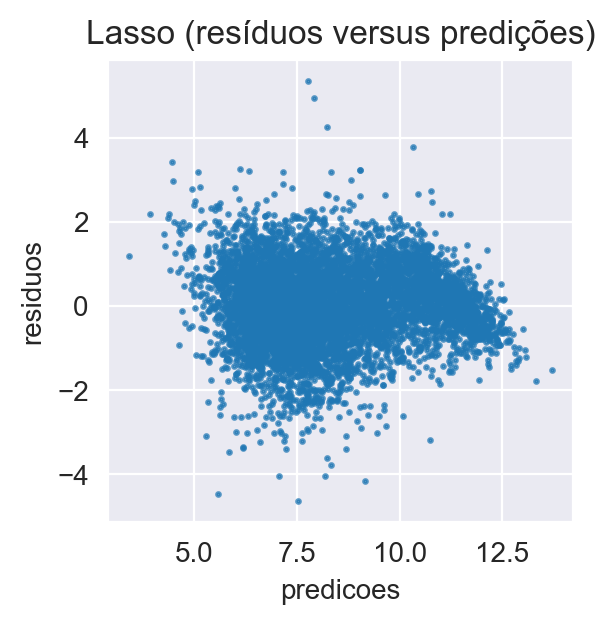

In [50]:
matplotlib.rcParams['figure.figsize'] = (3.0, 3.0)
preds = pd.DataFrame({"predicoes":train_predictions_lasso_all, "valor_verdadeiro":y_test})
preds["residuos"] = preds["valor_verdadeiro"] - preds["predicoes"]
preds.plot(x = "predicoes", y = "residuos",kind = "scatter", alpha=0.7 , s=2)
plt.title("Lasso (resíduos versus predições)")

## 6.3 - Discussões finais

O modelo que deu melhor resultado, como pode ser observado no gráfico de dispersão os valores, é o modelo RIDGE que os valores de resíduo vão de -2 e 2 com valores concentrados, enquanto que no gráfico do modelo LASSO de -4 a 4 tendo pontos mais espalhados, apresentando um erro maior. Observando os valores de RMSE, podemos verificar que para o RIDGE o valor encontrado é de aprox. 0.461, enquanto que o LASSO é de aprox. 0.918.